Kaggle dataset location => https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos

# Importing Libraries

In [1]:
import pandas as pd       
import numpy as np        
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
calories=pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise=pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [6]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [7]:
df=pd.concat([exercise,calories['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

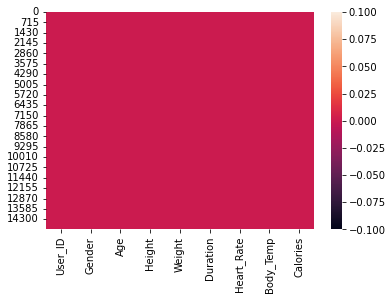

In [9]:
sns.heatmap(df.isnull())

In [17]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [18]:
df.shape

(15000, 9)

In [19]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# will work on Target variable

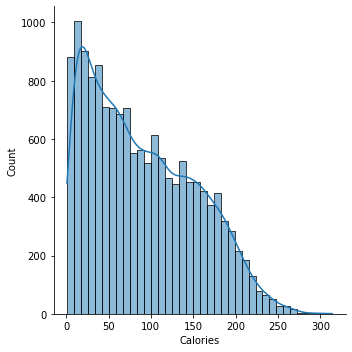

In [20]:
sns.displot(df.Calories,kde=True)

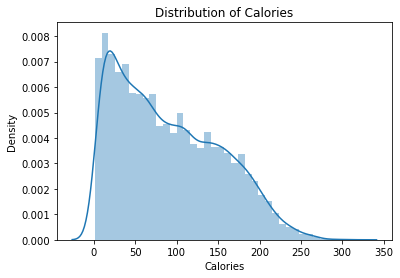

In [21]:
sns.distplot(df.Calories)
plt.title('Distribution of Calories')
plt.show()

<AxesSubplot:xlabel='Calories'>

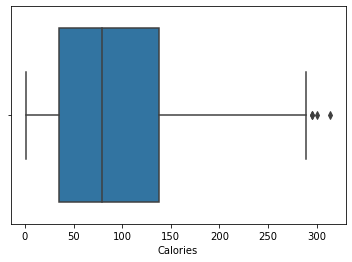

In [22]:
sns.boxplot(df.Calories)

In [24]:
Q1=df.Calories.quantile(0.25)
Q3=df.Calories.quantile(0.75)
IQR=Q3-Q1                     # Inter quartile range
LE=Q1-1.5*IQR                 # Lower End
HE=Q3+1.5*IQR                 # Higher End
print(len(df[df.Calories>HE]))
print(len(df[df.Calories<LE]))

4
0


In [27]:
outliers=list(df[df.Calories>HE].index)

In [28]:
df.drop(outliers,axis=0,inplace=True)

In [29]:
df.shape

(14996, 9)

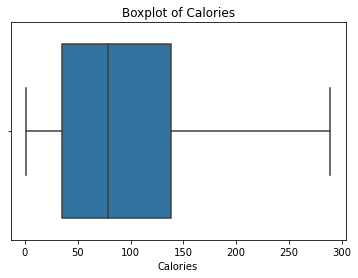

In [30]:
sns.boxplot(df.Calories)
plt.title("Boxplot of Calories")
plt.show()

<AxesSubplot:xlabel='Calories', ylabel='Density'>

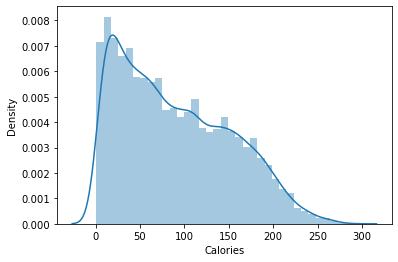

In [31]:
sns.distplot(df.Calories)

## Now will work on Independent Variable

In [35]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [36]:
df.drop('User_ID',axis=1,inplace=True)

## 1. Gender

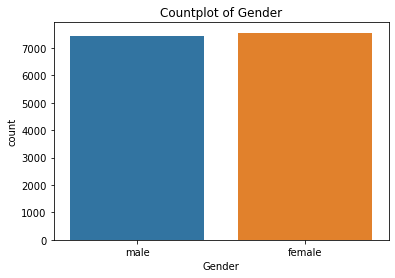

In [37]:
sns.countplot(df.Gender)
plt.title('Countplot of Gender')
plt.show()

In [38]:
df.groupby('Gender')['Calories'].mean()     # The means are almost same by doing statistical test will see its a good predictor or not

Gender
female    88.153052
male      90.832863
Name: Calories, dtype: float64

In [41]:
from scipy.stats import ttest_ind

In [42]:
dfm=df[df.Gender=='male']
dff=df[df.Gender=='female']

ttest_ind(dfm['Calories'],dff['Calories'])

Ttest_indResult(statistic=2.631255648875332, pvalue=0.008515705659545776)

## Gender is a good predictor

# Age

In [44]:
df.Age.dtype

dtype('int64')

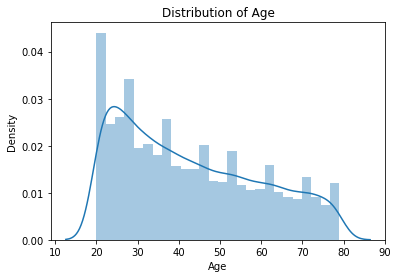

In [46]:
sns.distplot(df.Age)
plt.title('Distribution of Age')
plt.show()

In [43]:
num_cols=df.select_dtypes(exclude='object')

In [44]:
num_cols.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

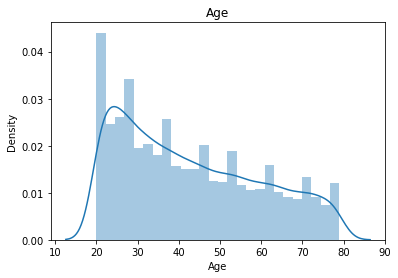

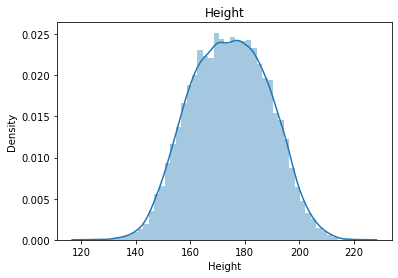

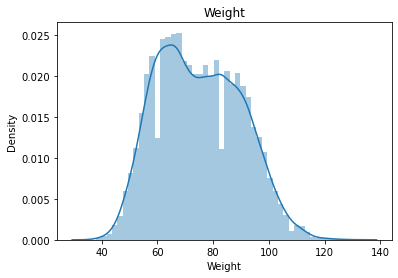

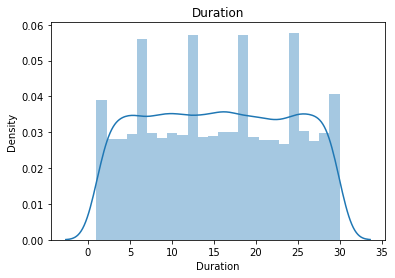

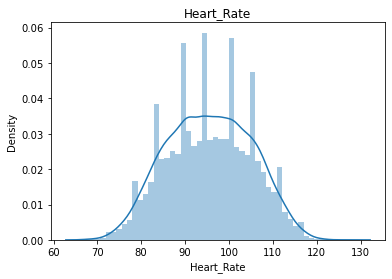

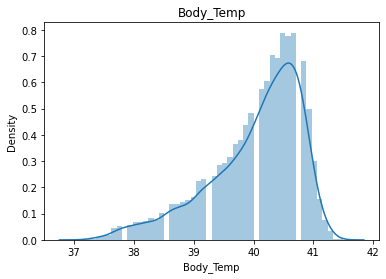

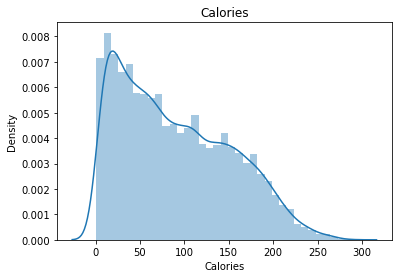

In [45]:
for i in num_cols.columns:
    sns.distplot(num_cols[i])
    plt.title(i)
    plt.show()

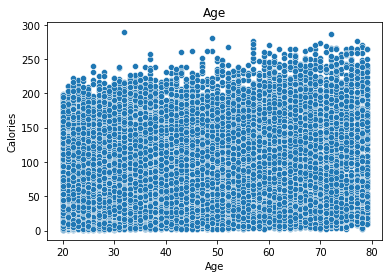

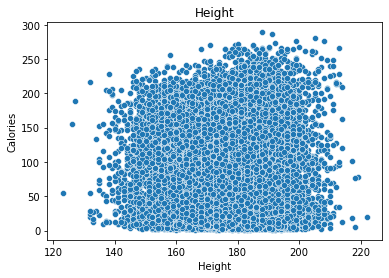

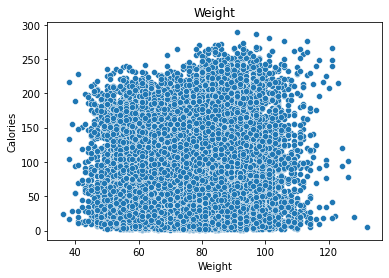

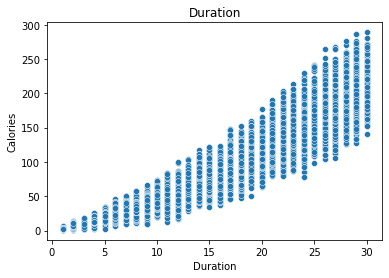

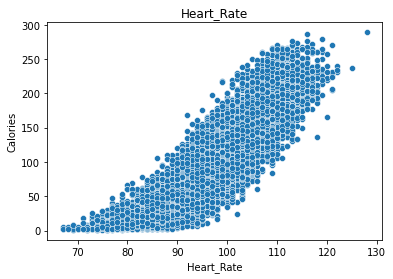

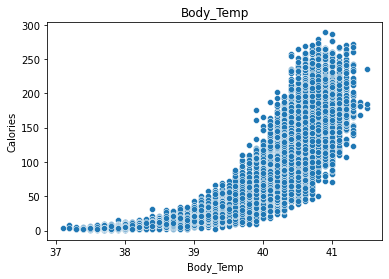

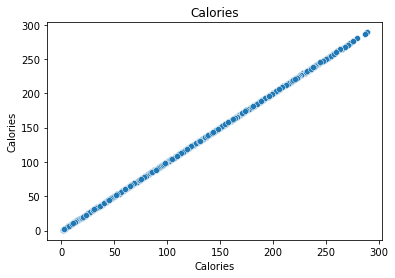

In [58]:
for i in num_cols.columns:
    sns.scatterplot(df[i],df['Calories'])
    plt.title(i)
    plt.show()

In [59]:
np.corrcoef(df['Age'],df['Calories'])            # what is the range of correlation  -1 to +1

array([[1.        , 0.15318281],
       [0.15318281, 1.        ]])

In [65]:
for i in num_cols.columns:
    print(i)
    print(np.corrcoef(df[i],df['Calories']))
    print()
    

Age
[[1.         0.15318281]
 [0.15318281 1.        ]]

Height
[[1.         0.01658278]
 [0.01658278 1.        ]]

Weight
[[1.         0.03451864]
 [0.03451864 1.        ]]

Duration
[[1.        0.9558031]
 [0.9558031 1.       ]]

Heart_Rate
[[1.         0.89767273]
 [0.89767273 1.        ]]

Body_Temp
[[1.         0.82502586]
 [0.82502586 1.        ]]

Calories
[[1. 1.]
 [1. 1.]]



<AxesSubplot:>

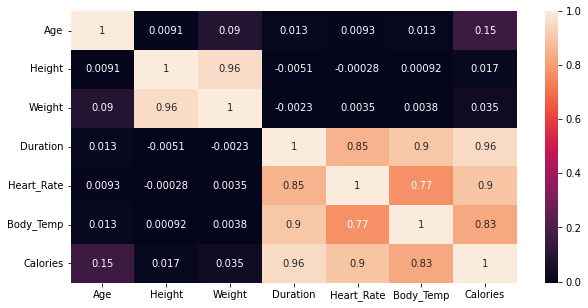

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(num_cols.corr(),annot=True)

**By using correlation matrix you can easily say that [Age,Height,Weight] is not highly correlated with the target variable calories so these features need not to be considered for building the model**

In [46]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [47]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [49]:
df.Gender.value_counts()

female    7553
male      7443
Name: Gender, dtype: int64

In [52]:
df['Gender']=pd.get_dummies(df.Gender,drop_first=True)

In [56]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [57]:
X=df.drop(['Age', 'Height', 'Weight','Calories'],axis=1)
y=df['Calories']

In [58]:
# will load the libraries for building the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [94]:
# Will split the data to train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [96]:
X_train.head()

,Gender,Duration,Heart_Rate,Body_Temp
11413,1,16.0,97.0,39.9
819,1,12.0,92.0,39.7
11503,0,28.0,102.0,41.0
13287,0,7.0,81.0,39.4
9895,0,26.0,105.0,40.8


## LinearRegression

In [97]:
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_train =',r2_score_test)

rmse_train = 14.223032889542555
rmse_test = 14.712306375694128
r2_score_train = 0.9475475749379713
r2_score_train = 0.9454121252795318


In [103]:
# if we want to work on SGDRegressor we want to keep all the data into same standard 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## SGDRegressor

In [106]:
model2=SGDRegressor()
model2.fit(X_train,y_train)
y_pred_train=model2.predict(X_train)
y_pred_test=model2.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_train =',r2_score_test)

rmse_train = 14.227551167526704
rmse_test = 14.713340235238027
r2_score_train = 0.9475142441733376
r2_score_train = 0.9454044530387893


# DecisionTreeRegressor

In [108]:
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)
y_pred_train=model3.predict(X_train)
y_pred_test=model3.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 7.522415484462434
rmse_test = 15.745078261668755
r2_score_train = 0.9853277817847639
r2_score_test = 0.9374792307424948


# RandomForestRegressor

In [109]:
model4=RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred_train=model4.predict(X_train)
y_pred_test=model4.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_train =',r2_score_test)

rmse_train = 8.03926863482172
rmse_test = 13.721897216824393
r2_score_train = 0.9832423071757772
r2_score_train = 0.9525142841376486


# XGBRegressor

In [110]:
model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred_train=model5.predict(X_train)
y_pred_test=model5.predict(X_test)
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)
print('r2_score_train =',r2_score_train)
print('r2_score_train =',r2_score_test)

rmse_train = 9.781535995998773
rmse_test = 12.898659858585113
r2_score_train = 0.9751917997813113
r2_score_train = 0.9580411239261537
